DATA VISUALIZATION

Demo: How to work with database

Download database file.

In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-09-19 19:23:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  33.1MB/s    in 1.1s    

2024-09-19 19:24:02 (33.1 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



In [3]:
#Connect to the database.
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [2]:
#Import pandas module.
import pandas as pd

Demo: How to run an sql query

In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


Demo: How to list all tables

In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


Demo: How to run a group by query

In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


Demo: How to describe a table

In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

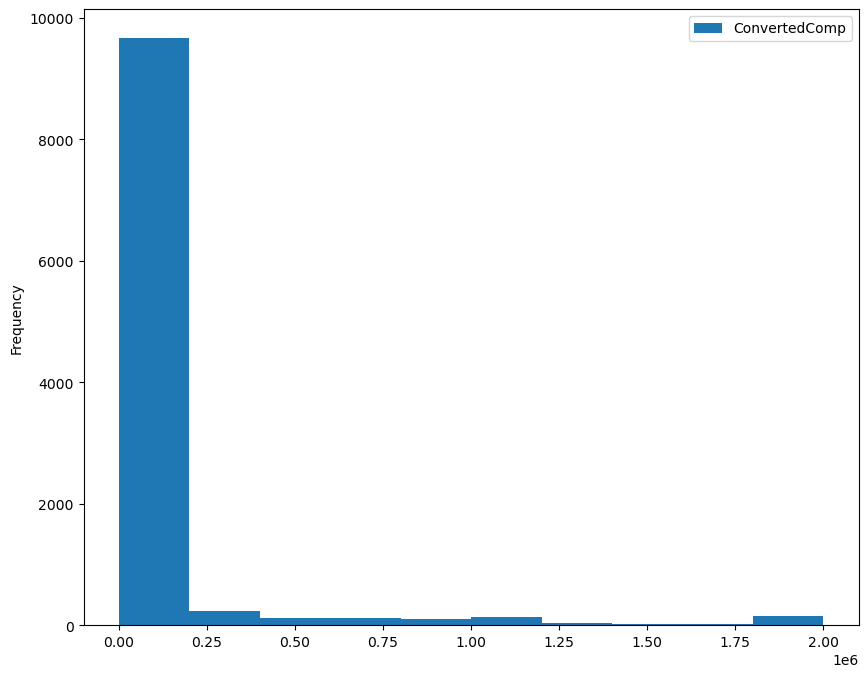

In [16]:
#Plot a histogram of ConvertedComp

QUERY1 = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY1,conn)
df.head()
df.plot(kind='hist', figsize=(10, 8) )

plt.show()

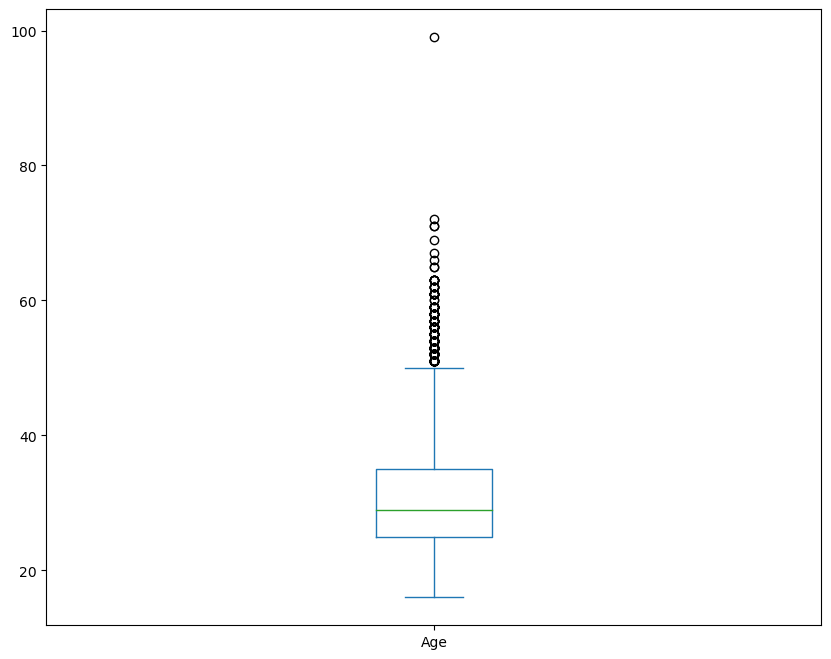

In [13]:
#Plot a box plot of Age
QUERY2 = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY2,conn)
df.head()
df.plot(kind='box', figsize=(10, 8) )

plt.show()

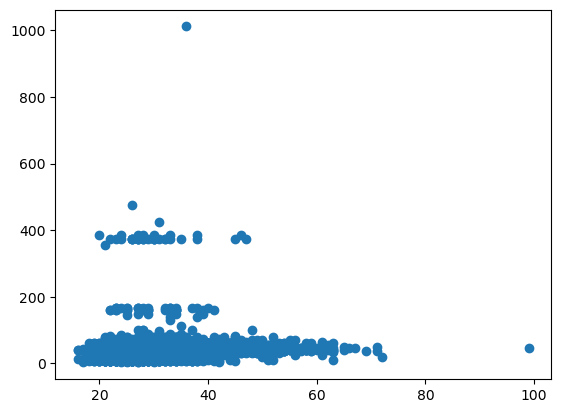

In [21]:
#Create a scatter plot of Age and WorkWeekHrs.

Age = pd.read_sql_query(QUERY2, conn)
WWH = pd.read_sql_query('SELECT WorkWeekHrs FROM master', conn)

Query3 = """
SELECT Age, WorkWeekHrs
FROM master
"""
Age_WWH = pd.read_sql_query(Query3, conn)
plt.scatter(x = Age, y = WWH)
plt.show()

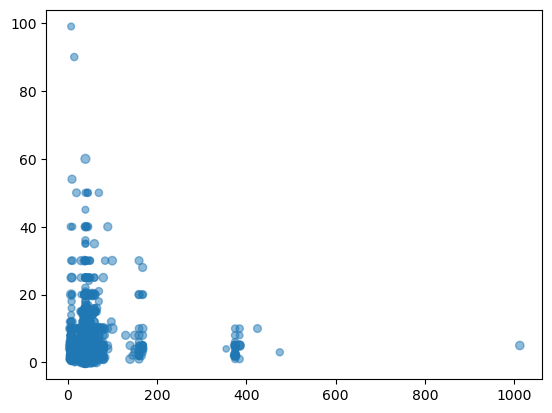

In [22]:
CRH = pd.read_sql_query('SELECT CodeRevHrs FROM master', conn)

Query4 = """
SELECT WorkWeekHrs, CodeRevHrs
FROM master
"""
Age_WWH = pd.read_sql_query(Query4, conn)
plt.scatter(x = WWH, y = CRH, s = Age, alpha=0.5)
plt.show()

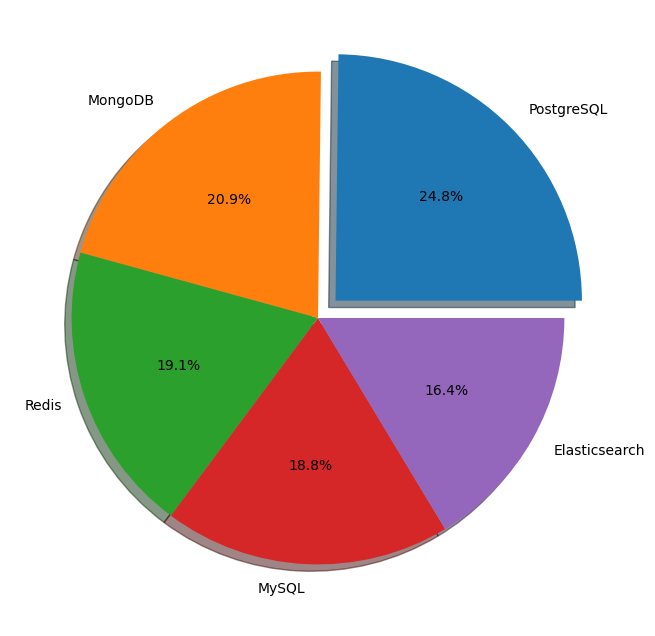

In [23]:
QUERY = """
SELECT *, COUNT(*) AS count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

data = df['count']
labels = df['DatabaseDesireNextYear']

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', explode = (0.1, 0, 0, 0, 0), shadow = True)
plt.show()

   Respondent LanguageDesireNextYear  count
0           4             JavaScript   6630
1           9               HTML/CSS   5328
2          20                 Python   5239
3           4                    SQL   5012
4           9             TypeScript   4088


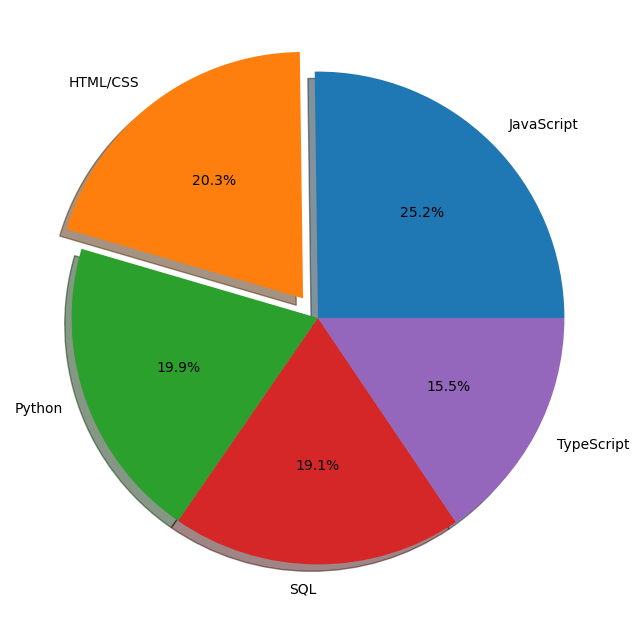

In [24]:
QUERY = """
SELECT *, COUNT(*) AS count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

data = df['count']
labels = df['LanguageDesireNextYear']

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', explode = (0, 0.1, 0, 0, 0), shadow = True)
plt.show()

How many respondents indicated that they currently work with 'SQL'?

   Respondent     LanguageWorkedWith  count
0           9             JavaScript   8687
1           9               HTML/CSS   7830
2           4                    SQL   7106
3           9  Bash/Shell/PowerShell   4642
4           4                 Python   4542


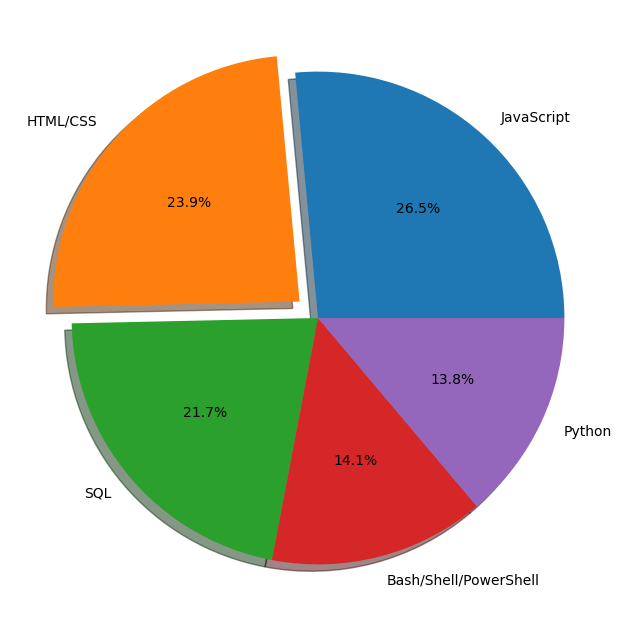

In [25]:
QUERY = """
SELECT *, COUNT(*) AS count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

data = df['count']
labels = df['LanguageWorkedWith']

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()
ax.pie(data, labels = labels, autopct='%1.1f%%', explode = (0, 0.1, 0, 0, 0), shadow = True)
plt.show()

Stacked Charts

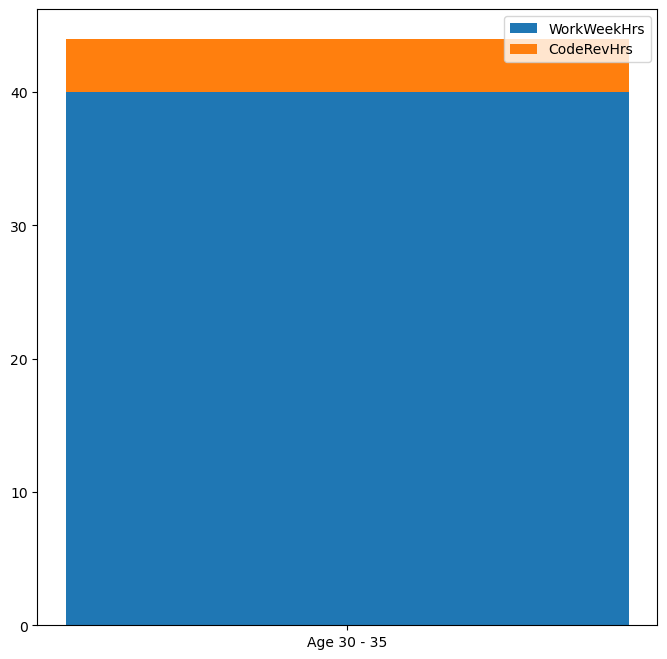

In [27]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35

"""
df = pd.read_sql_query(QUERY,conn)

work_week = df['WorkWeekHrs'].quantile(0.5)
code_rev = df['CodeRevHrs'].quantile(0.5)


plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()

ax.bar('Age 30 - 35', work_week, label='WorkWeekHrs')
ax.bar('Age 30 - 35', code_rev, bottom=work_week, label='CodeRevHrs')
ax.legend()

plt.show()

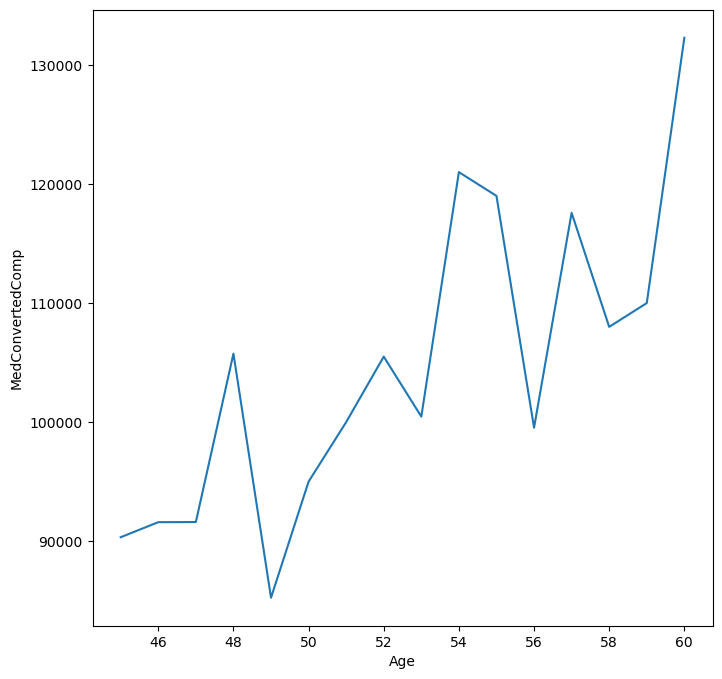

In [28]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60

"""
df = pd.read_sql_query(QUERY,conn)

medians = df.groupby('Age')['ConvertedComp'].median()

data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedConvertedComp'])

plt.rcParams['figure.figsize'] = [8,8]

sns.lineplot(data=data, x='Age', y = 'MedConvertedComp')

plt.show()


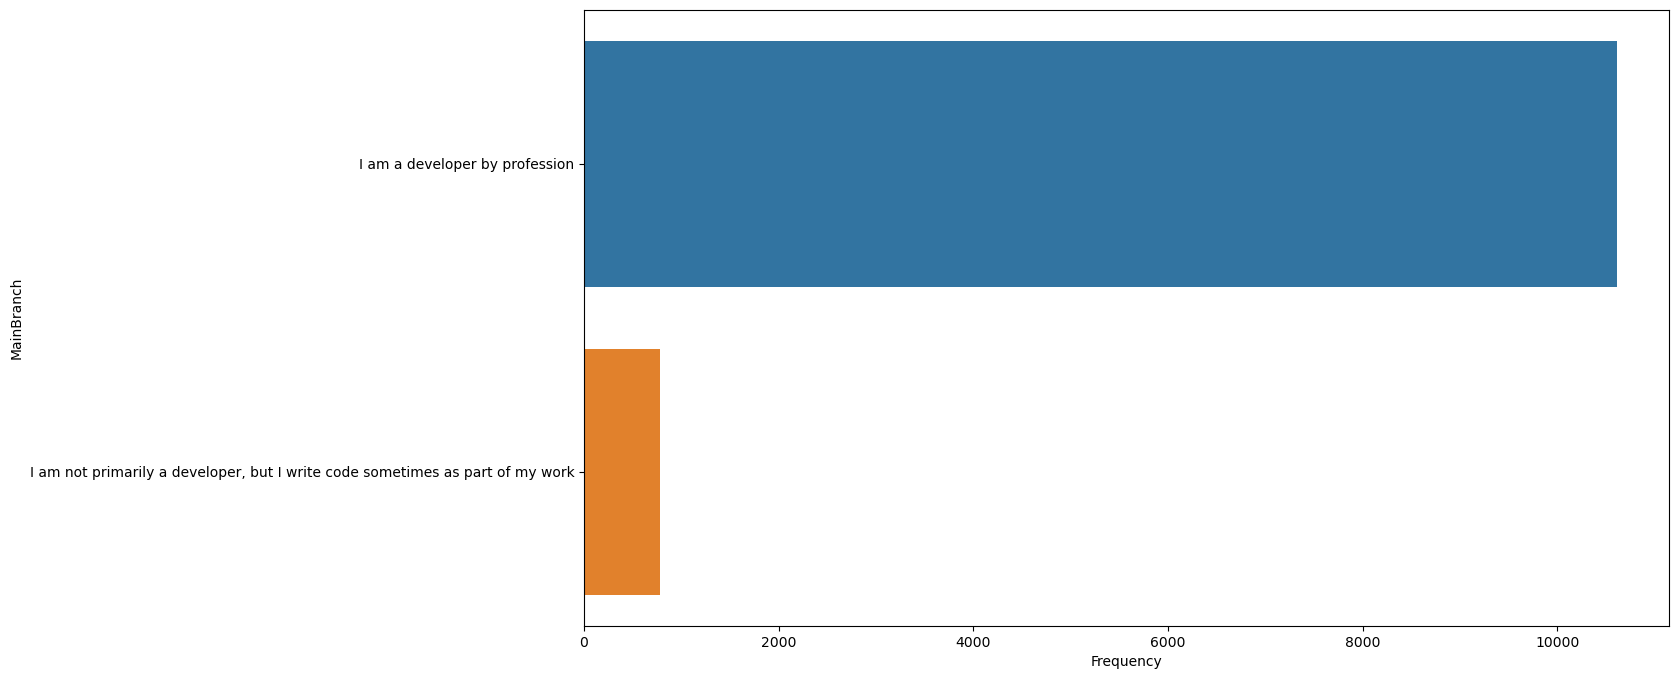

In [29]:
QUERY = """
SELECT MainBranch, COUNT(*) AS Frequency
FROM master
GROUP BY MainBranch

"""
df = pd.read_sql_query(QUERY,conn)

plt.rcParams['figure.figsize'] = [14, 8]

sns.barplot(data = df, y = 'MainBranch', x = 'Frequency', orient = 'h')

plt.show()

In [ ]:
Finally , we close the database connection.

In [30]:
conn.close()